<a href="https://colab.research.google.com/github/dajebbar/FreeCodeCamp-python-data-analysis/blob/main/ML3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and Prepare data

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

In [27]:
!pip install -U opendatasets  --quiet

In [28]:
import opendatasets as od
import os 

url = 'https://www.kaggle.com/c/titanic/data'
data_dir = od.download(url)

Skipping, found downloaded files in "./titanic" (use force=True to force download)


In [29]:
train_df = pd.read_csv('./titanic/train.csv')
test_df = pd.read_csv('./titanic/test.csv')

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
data = train_df.drop(columns=['Survived'], axis=1)
target = train_df.Survived

In [32]:
data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
target.isna().sum()

0

In [34]:
target.value_counts(normalize=True) * 100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [ ]:
train_df.shape, test_df.shape

((891, 12), (418, 11))

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


# Variables inspection

In [36]:
!pip install -U yellowbrick --quiet

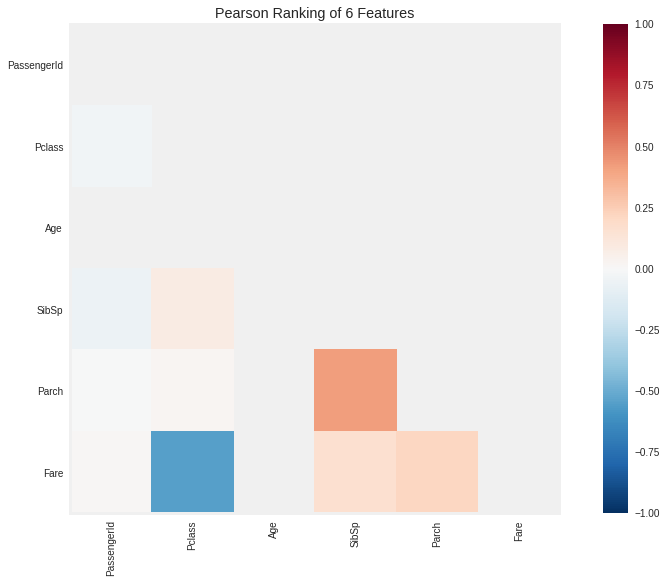

In [37]:
# redundancy between variables
# correlations between pairs of variables

from sklearn.compose import make_column_selector as selector
from yellowbrick.features import Rank2D

num_features = selector(dtype_include='number')(data)
cat_features = selector(dtype_include='object')(data)
_, r2d = plt.subplots(figsize=(14, 9))
r2d = Rank2D()
r2d.fit_transform(data[num_features])
r2d.show()

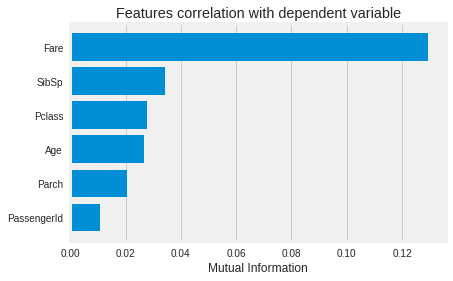

In [38]:
# pertinence with target

from yellowbrick.target import FeatureCorrelation
fc = FeatureCorrelation(method='mutual_info-classification', sort=True)
fc.fit(data[num_features].fillna(value=data[num_features].mean()), 
       target, discrete_features=False)
fc.show()

# Modelisation

In [39]:
print(num_features)
print(cat_features)

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=.25,
    random_state=42, stratify=target,
)

In [42]:
# Verify distributions
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.616766
1    0.383234
Name: Survived, dtype: float64
0    0.61435
1    0.38565
Name: Survived, dtype: float64


In [43]:
# Impute data
# from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()

imputer.fit(data[num_features])

X_train[num_features] = imputer.transform(X_train[num_features])
X_test[num_features] = imputer.transform(X_test[num_features])

test_df[num_features] = imputer.transform(test_df[num_features])

In [50]:
from scipy import sparse
# Normalize data
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    OrdinalEncoder,
)

scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

scaler.fit(data[num_features])

X_train[num_features] = scaler.transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

test_df[num_features] = scaler.transform(test_df[num_features])

data2 = data[cat_features].fillna('Unknown')
encoder.fit(data2)


OneHotEncoder(handle_unknown='ignore', sparse=False)

In [45]:
encoder.categories_

[array(['Abbing, Mr. Anthony', 'Abbott, Mr. Rossmore Edward',
        'Abbott, Mrs. Stanton (Rosa Hunt)', 'Abelson, Mr. Samuel',
        'Abelson, Mrs. Samuel (Hannah Wizosky)',
        'Adahl, Mr. Mauritz Nils Martin', 'Adams, Mr. John',
        'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
        'Aks, Mrs. Sam (Leah Rosen)', 'Albimona, Mr. Nassef Cassem',
        'Alexander, Mr. William', 'Alhomaki, Mr. Ilmari Rudolf',
        'Ali, Mr. Ahmed', 'Ali, Mr. William',
        'Allen, Miss. Elisabeth Walton', 'Allen, Mr. William Henry',
        'Allison, Master. Hudson Trevor', 'Allison, Miss. Helen Loraine',
        'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)',
        'Allum, Mr. Owen George',
        'Andersen-Jensen, Miss. Carla Christine Nielsine',
        'Anderson, Mr. Harry', 'Andersson, Master. Sigvard Harald Elias',
        'Andersson, Miss. Ebba Iris Alfrida',
        'Andersson, Miss. Ellis Anna Maria',
        'Andersson, Miss. Erna Alexandra',
        'Andersson, 

In [46]:
encoded_cols = list(encoder.get_feature_names_out(cat_features))
print(encoded_cols)

['Name_Abbing, Mr. Anthony', 'Name_Abbott, Mr. Rossmore Edward', 'Name_Abbott, Mrs. Stanton (Rosa Hunt)', 'Name_Abelson, Mr. Samuel', 'Name_Abelson, Mrs. Samuel (Hannah Wizosky)', 'Name_Adahl, Mr. Mauritz Nils Martin', 'Name_Adams, Mr. John', 'Name_Ahlin, Mrs. Johan (Johanna Persdotter Larsson)', 'Name_Aks, Mrs. Sam (Leah Rosen)', 'Name_Albimona, Mr. Nassef Cassem', 'Name_Alexander, Mr. William', 'Name_Alhomaki, Mr. Ilmari Rudolf', 'Name_Ali, Mr. Ahmed', 'Name_Ali, Mr. William', 'Name_Allen, Miss. Elisabeth Walton', 'Name_Allen, Mr. William Henry', 'Name_Allison, Master. Hudson Trevor', 'Name_Allison, Miss. Helen Loraine', 'Name_Allison, Mrs. Hudson J C (Bessie Waldo Daniels)', 'Name_Allum, Mr. Owen George', 'Name_Andersen-Jensen, Miss. Carla Christine Nielsine', 'Name_Anderson, Mr. Harry', 'Name_Andersson, Master. Sigvard Harald Elias', 'Name_Andersson, Miss. Ebba Iris Alfrida', 'Name_Andersson, Miss. Ellis Anna Maria', 'Name_Andersson, Miss. Erna Alexandra', 'Name_Andersson, Miss. In

In [51]:
X_train[encoded_cols] = encoder.transform(X_train[cat_features].fillna('Unknown'))
X_test[encoded_cols] = encoder.transform(X_test[cat_features].fillna('Unknown'))
test_df[encoded_cols] = encoder.transform(test_df[cat_features].fillna('Unknown'))

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at o

In [52]:
pd.set_option('display.max_columns', None)
test_df.head()

PassengerId    Pclass                                          Name  \
0    -1.727254 -1.772692                              Kelly, Mr. James   
1    -1.727239 -1.772692              Wilkes, Mrs. James (Ellen Needs)   
2    -1.727224 -3.204883                     Myles, Mr. Thomas Francis   
3    -1.727209 -1.772692                              Wirz, Mr. Albert   
4    -1.727194 -1.772692  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   

      Sex       Age     SibSp     Parch   Ticket      Fare Cabin Embarked  \
0    male -2.023129 -0.905118 -1.061646   330911 -0.658303   NaN        Q   
1  female -1.963810 -0.081855 -1.061646   363272 -0.658640   NaN        S   
2    male -1.892627 -0.905118 -1.061646   240276 -0.657550   NaN        Q   
3    male -2.058721 -0.905118 -1.061646   315154 -0.657966   NaN        S   
4  female -2.082449 -0.081855  0.479188  3101298 -0.656496   NaN        S   

   Name_Abbing, Mr. Anthony  Name_Abbott, Mr. Rossmore Edward  \
0                       0.0                               0.0   
1                       0.0                               0.0   
2                       0.0                               0.0   
3                       0.0                               0.0   
4                       0.0                               0.0   

   Name_Abbott, Mrs. Stanton (Rosa Hunt)  Name_Abelson, Mr. Samuel  \
0                                    0.0                       0.0   
1                                    0.0                       0.0   
2                                    0.0                       0.0   
3                                    0.0                       0.0   
4                                    0.0                       0.0   

   Name_Abelson, Mrs. Samuel (Hannah Wizosky)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Name_Adahl, Mr. Mauritz Nils Martin  Name_Adams, Mr. John  \
0                                  0.0                   0.0   
1                                  0.0                   0.0   
2                                  0.0                   0.0   
3                                  0.0                   0.0   
4                                  0.0                   0.0   

   Name_Ahlin, Mrs. Johan (Johanna Persdotter Larsson)  \
0                                                0.0     
1                                                0.0     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Name_Aks, Mrs. Sam (Leah Rosen)  Name_Albimona, Mr. Nassef Cassem  \
0                              0.0                               0.0   
1                              0.0                               0.0   
2                              0.0                               0.0   
3                              0.0                               0.0   
4                              0.0                               0.0   

   Name_Alexander, Mr. William  Name_Alhomaki, Mr. Ilmari Rudolf  \
0                          0.0                               0.0   
1                          0.0                               0.0   
2                          0.0                               0.0   
3                          0.0                               0.0   
4                          0.0                               0.0   

   Name_Ali, Mr. Ahmed  Name_Ali, Mr. William  \
0                  0.0                    0.0   
1                  0.0                    0.0   
2                  0.0                    0.0   
3                  0.0                    0.0   
4                  0.0                    0.0   

   Name_Allen, Miss. Elisabeth Walton  Name_Allen, Mr. William Henry  \
0                                 0.0        